In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold

In [18]:
%%time

pixels, targets = datasets.fetch_openml(
    'mnist_784', version=1, return_X_y=True
)

targets = targets.astype(int)

pixels, targets

CPU times: user 27 s, sys: 841 ms, total: 27.9 s
Wall time: 27.9 s


(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
        pixel1

In [33]:
import random

def show_random_mnist():
    i = random.choice(range(pixels.shape[0]))
    print(f"Index: {i}, Target: {targets[i]}")
    
    image = pixels.loc[i, :].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')

Index: 13132, Target: 4


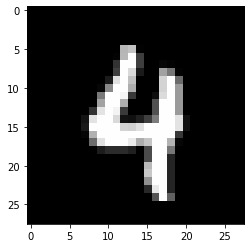

In [113]:
show_random_mnist()

In [141]:
%%time
max_index = 10000

tsne = manifold.TSNE(n_components=2, random_state=42)
plane_pixels=tsne.fit_transform(pixels.iloc[:max_index,:])

tsne = pd.DataFrame(
    np.column_stack((plane_pixels, targets.iloc[:max_index])),
    columns=["x", "y", "target"]
)

tsne.target = tsne.target.astype('int')
tsne

CPU times: user 4min 4s, sys: 15.7 s, total: 4min 20s
Wall time: 22.8 s


,x,y,target
0,41.823372,4.305034,5
1,51.921452,-35.015118,0
2,37.115925,66.432014,4
3,-64.611313,26.061253,1
4,10.549828,31.709473,9
...,...,...,...
9995,49.580177,10.109571,5
9996,3.168185,14.608848,8
9997,-12.239561,-59.395626,6
9998,20.046906,37.306427,9


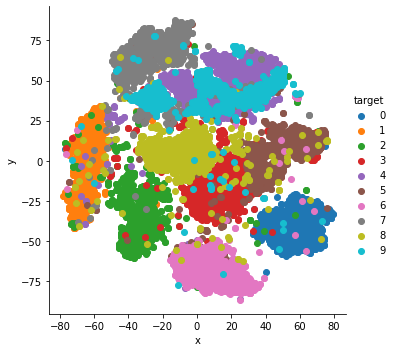

In [155]:
grid = sns.FacetGrid(tsne, hue="target", height=5)
grid.map(plt.scatter, "x", "y").add_legend()
plt.show()

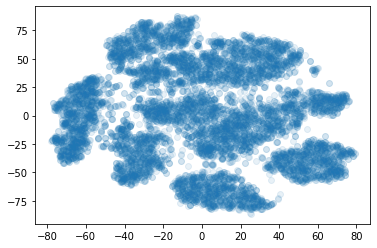

In [150]:
plt.scatter(tsne.x, tsne.y, alpha=.1)
plt.show()